# 如何使用Keras函數式API進行深度學習

Keras使得創建深度學習模型變得快速而簡單。

序貫(sequential)API允許您為大多數問題逐層堆疊創建模型。雖然說對很多的應用來說, 這樣的一個手法很簡單也解決
了很多深度學習網絡結構的構建，但是它也有限制 - 它不允許你創建模型有共享層或有多個輸入或輸出的網絡。

Keras中的函數式(functional)API是創建網絡模型的另一種方式，它提供了更多的靈活性，包括創建更複雜的模型。

在這個文章中，您將了解如何使用Keras中更靈活的函數式(functional)API來定義深度學習模型。

完成這個文章的相關範例, 您將知道：
* Sequential和Functional API之間的區別。
* 如何使用功能性(functional)API定義簡單的多層感知器(MLP)，卷積神經網絡(CNN)和遞歸神經網絡(RNN)模型。
* 如何用共享層和多個輸入輸出來定義更複雜的模型。

![network topology](https://www.codeproject.com/KB/AI/1215045/Popular-Neural-Network-Architecture.jpg)

In [12]:
# 這個Jupyter Notebook的環境
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Windows-10-10.0.22621-SP0
Tensorflow version: 2.14.0
Keras version: 2.14.0


In [13]:
tensorflow.__version__

'2.14.0'

## 1. Keras 序貫模型 (Sequential Models)

Keras提供了一個Sequential模型API。

它是創建深度學習模型的一種相對簡單的方法，我們透過創建Kears的Sequential類別實例(instance), 然後創建模型圖層
並添加到其中。

例如，可以定義多個圖層並將以陣列的方式一次做為參數傳遞給Sequential：

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# 構建模型
model = Sequential([Dense(2, input_shape=(1,)), Dense(1)])

當然我們也可以一層一層也分段添加上去：

In [2]:
from keras.models import Sequential
from keras.layers import Dense

# 構建模型
model = Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1))

Sequential模型API對於在大多數情況下非常有用與方便，但也有一些局限性。
例如，網絡拓撲結構可能具有多個不同輸入，產生多個輸出或重複使用共享圖層的複雜模型。

## 2. Keras 函數式(functional)API構建模型

Keras函數式(functional)API為構建網絡模型提供了更為靈活的方式。

它允許您定義多個輸入或輸出模型以及共享圖層的模型。除此之外，它允許您定義動態(ad-hoc)的非週期性(acyclic)網絡圖。

模型是通過創建層的實例(layer instances)並將它們直接相互連接成對來定義的，然後定義一個模型(model)來指定那些層是要作為
這個模型的輸入和輸出。

讓我們依次看看Keras功能(functional)API的三個獨特特性：

### 2.1 定義輸入

與Sequential模型不同，您必須創建獨立的Input層物件的instance並定義輸入數據張量的維度形狀(tensor shape)。

輸入層採用一個張量形狀參數(tensor shape)，它是一個tuple，用於宣吿輸入張量的維度。

例如: 我們要把MNIST的每張圖像(28x28)打平成一個一維(784)的張量做為一個多層感知器(MLP)的Input

In [3]:
from keras.layers import Input

mnist_input = Input(shape=(784,))

### 2.2 連接不同的網絡層

模型中的神經層是成對連接的,就像是一個樂高積木一樣有一面是凸一面是凹, 一個神經層的輸出會接到另一個神經層的輸入。

這是通過在定義每個新神經層時指定輸入的來源來完成的。使用括號表示法，以便在創建圖層之後，指定作為輸入的神經層。

我們用一個簡短的例子來說明這一點。我們可以像上面那樣創建輸入層，然後創建一個隱藏層作為密集層，它接收來自輸入層的輸入。

In [4]:
from keras.layers import Input
from keras.layers import Dense

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)

正是這種逐層連接的方式賦予功能性(functional)API靈活性。您可以看到開始一些動態的神經網絡是多麼容易。

### 2.3 創建模型

在創建所有模型圖層並將它們連接在一起之後，您必須定義一個模型(Model)物件的instance。

與Sequential API一樣，這個模型是您可以用於總結(summarize)，擬合(fit)，評估(evaluate)和預測(predict)。

Keras提供了一個Model類別，您可以使用它從創建的圖層創建模型的instance。它會要求您只指定整個模型的第一個輸入層和最後一個的輸出層。例如：

In [8]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)

model = Model(inputs=mnist_input, outputs=hidden)



現在我們已經知道了Keras函數式API的所有關鍵部分，讓我們通過定義一系列不同的模型來開展工作。

每個範例都是可以執行的，並打印網絡結構及產生網絡圖表。我建議你為自己的模型做這個事情，以明確你所定義的是什麼樣的網絡結構。

我希望這些範例能夠在將來使用函數式API定義自己的模型時為您提供模板。

## 3.標準網絡模型

在開始使用函數式API時，最好先看一些標準的神經網絡模型是如何定義的。

在本節中，我們將著眼於定義一個簡單的多層感知器(MLP)，卷積神經網絡(CNN)和遞歸神經網絡(RNN)。

這些範例將為以後了解更複雜的網絡構建提供基礎。

### 3.1 多層感知器(Multilayer Perceptron)

讓我們來定義了一個多類別分類(multi-class classification)的多層感知器(MLP)模型。

該模型有784個輸入，3個隱藏層，512,216和128個隱藏神經元，輸出層有10個輸出。

在每個隱藏層中使用`relu`激活函數，並且在輸出層中使用`softmax`激活函數進行多類別分類。

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 216)               110808    
                                                                 
 hidden3 (Dense)             (None, 128)               27776     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 541794 (2.07 MB)
Trainable params: 541794 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


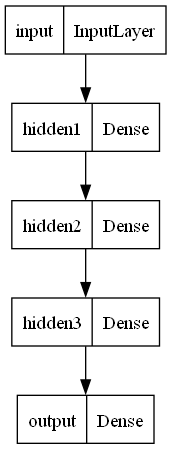

In [9]:
# 多層感知器(MLP)模型
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(10, activation='softmax', name='output')(hidden3)

model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓撲圖
plot_model(model, to_file='multilayer_perceptron_graph.png')

# 秀出網絡拓撲圖
Image('multilayer_perceptron_graph.png')

### 3.2 卷積神經網絡(CNN)

我們將定義一個用於圖像分類的卷積神經網絡(convolutional neural network)。

該模型接收灰階的28×28圖像作為輸入，然後有一個作為特徵提取器的兩個卷積和池化層的序列，
然後是一個完全連接層來解釋特徵，並且具有用於10類預測的`softmax`激活的輸出層。

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 25, 25, 128)       2176      
                                                                 
 pool1 (MaxPooling2D)        (None, 12, 12, 128)       0         
                                                                 
 conv2 (Conv2D)              (None, 9, 9, 64)          131136    
                                                                 
 pool2 (MaxPooling2D)        (None, 4, 4, 64)          0         
                                                                 
 hidden1 (Dense)             (None, 4, 4, 64)          4160      
                                                                 
 output (Dense)              (None, 4, 4, 10)          650 

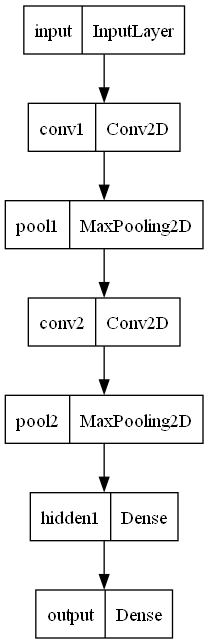

In [16]:
# 卷積神經網絡(CNN)
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓撲圖
plot_model(model, to_file='convolutional_neural_network.png')

# 秀出網絡拓撲圖
Image('convolutional_neural_network.png')

### 3.3 遞歸神經網絡(RNN)

我們將定義一個長期短期記憶(LSTM)遞歸神經網絡用於圖像分類。

該模型預期一個特徵的784個時間步驟作為輸入。該模型具有單個LSTM隱藏層以從序列中提取特徵，
接著是完全連接的層來解釋LSTM輸出，接著是用於進行10類別預測的輸出層。

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784, 1)]          0         
                                                                 
 lstm1 (LSTM)                (None, 128)               66560     
                                                                 
 hidden1 (Dense)             (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 84362 (329.54 KB)
Trainable params: 84362 (329.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


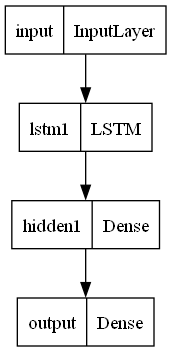

In [18]:
# 遞歸神經網絡(RNN)
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.layers import LSTM
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input') # 把每一個像素想成是一序列有前後關係的time_steps
lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(128, activation='relu', name='hidden1')(lstm1)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓撲圖
plot_model(model, to_file='recurrent_neural_network.png')

# 秀出網絡拓撲圖
Image('recurrent_neural_network.png')

## 4.共享層模型

多個神經層可以共享一個神經層的輸出來當成輸入。

例如，一個輸入可能可以有多個不同的特徵提取層，或者多個神經層用於解釋特徵提取層的輸出。

我們來看這兩個例子。

### 4.1 共享輸入層 (Shared Input Layer)

我們定義具有不同大小的內核的多個卷積層來解釋圖像輸入。

該模型使用28×28像素的灰階圖像。有兩個CNN特徵提取子模型共享這個輸入;第一個具有4的內核大小和第二個8的內核大小。
這些特徵提取子模型的輸出被平坦化(flatten)為向量(vector)，並且被串連成一個長向量, 然後被傳遞到完全連接的層以
用於在最終輸出層之前進行10類別預測。

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 25, 25, 32)           544       ['input[0][0]']               
                                                                                                  
 conv2 (Conv2D)              (None, 21, 21, 16)           1040      ['input[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 12, 12, 32)           0         ['conv1[0][0]']               
                                                                                            

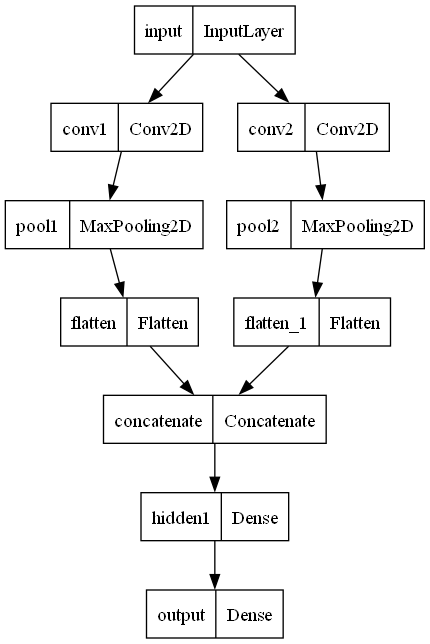

In [20]:
# 共享輸入層 
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import concatenate
from keras.utils import plot_model

# 輸入層
mnist_input = Input(shape=(28, 28, 1), name='input')

# 第一個特徵提取層
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(mnist_input) # <-- 看這裡
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# 第二個特徵提取層
conv2 = Conv2D(16, kernel_size=8, activation='relu', name='conv2')(mnist_input) # <-- 看這裡
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 把兩個特徵提取層的結果併起來
merge = concatenate([flat1, flat2])

# 進行全連結層
hidden1 = Dense(64, activation='relu', name='hidden1')(merge)

# 輸出層
output = Dense(10, activation='softmax', name='output')(hidden1)

# 以Model來組合整個網絡
model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

# plot graph
plot_model(model, to_file='shared_input_layer.png')

# 秀出網絡拓撲圖
Image('shared_input_layer.png')

### 4.2 共享特徵提取層 (Shared Feature Extraction Layer)

我們將使用兩個並行子模型來解釋用於序列分類的LSTM特徵提取器的輸出。

該模型的輸入是1個特徵的784個時間步長。具有10個存儲單元的LSTM層解釋這個序列。第一種解釋模型是淺層單連通層，
第二層是深層3層模型。兩個解釋模型的輸出連接成一個長向量，傳遞給用於進行10類別分類預測的輸出層。

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp1 (D

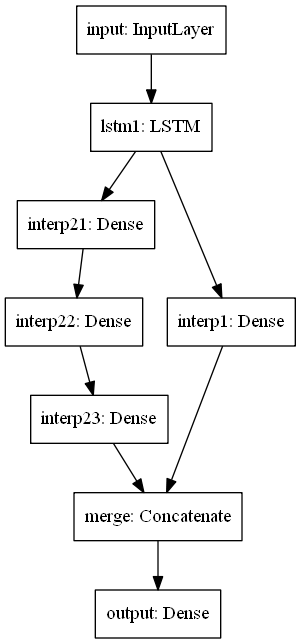

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model
# 輸入層
mnist_input = Input(shape=(784, 1), name='input') # 把每一個像素想成是一序列有前後關係的time_steps

# 特徵提取層
extract1 = LSTM(128, name='lstm1')(mnist_input)

# 第一個解釋層
interp1 = Dense(10, activation='relu', name='interp1')(extract1) # <-- 看這裡

# 第二個解釋層
interp21 = Dense(64, activation='relu', name='interp21')(extract1) # <-- 看這裡
interp22 = Dense(32, activation='relu', name='interp22')(interp21)
interp23 = Dense(16, activation='relu', name='interp23')(interp22)

# 把兩個特徵提取層的結果併起來
merge = concatenate([interp1, interp23], name='merge')

# 輸出層
output = Dense(10, activation='softmax', name='output')(merge)

# 以Model來組合整個網絡
model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

# plot graph
plot_model(model, to_file='shared_feature_extractor.png')

# 秀出網絡拓撲圖
Image('shared_feature_extractor.png')

## 5.多種輸入和輸出模型

函數式(functional)API也可用於開發具有多個輸入或多個輸出的模型的更複雜的模型。

### 5.1 多輸入模型

我們將開發一個圖像分類模型，將圖像的兩個版本作為輸入，每個圖像的大小不同。特別是一個灰階的64×64版本和一個32×32的彩色版本。分離的特徵提取CNN模型對每個模型進行操作，然後將兩個模型的結果連接起來進行解釋和最終預測。

請注意，在創建Model（）實例(instance)時，我們將兩個輸入圖層定義為一個數組(array)。

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

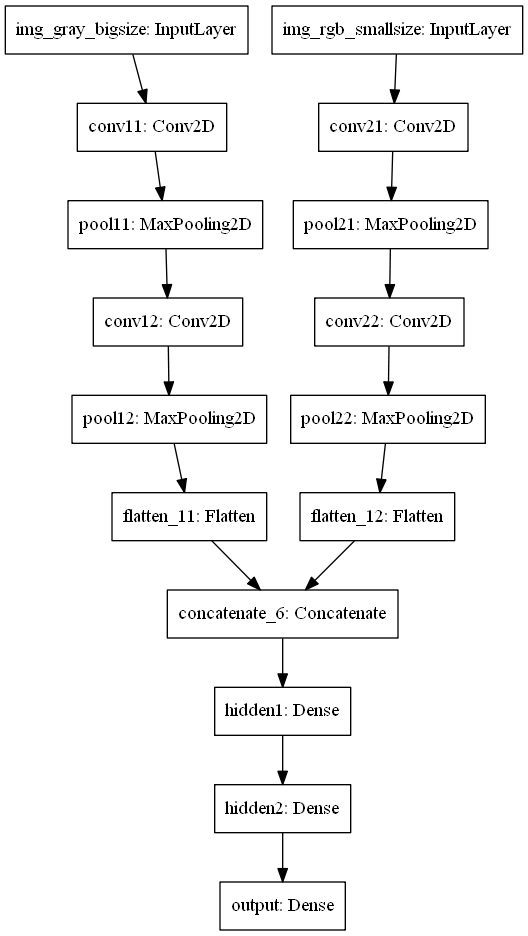

In [45]:
# 多輸入模型
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# 第一個輸入層
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flat1 = Flatten()(pool12)

# 第二個輸入層
img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

# 把兩個特徵提取層的結果併起來
merge = concatenate([flat1, flat2])

# 用隱藏的全連結層來解釋特徵
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)

# 輸出層
output = Dense(10, activation='softmax', name='output')(hidden2)

# 以Model來組合整個網絡
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

# 打印網絡結構
model.summary()

# plot graph
plot_model(model, to_file='multiple_inputs.png')

# 秀出網絡拓撲圖
Image('multiple_inputs.png')

### 5.2 多輸出模型

我們將開發一個模型，進行兩種不同類型的預測。給定一個特徵的784個時間步長的輸入序列，該模型將對該序列進行分類並輸出具有相同長度的新序列。

LSTM層解釋輸入序列並返回每個時間步的隱藏狀態。第一個輸出模型創建一個堆疊的LSTM，解釋這些特徵，並進行多類別預測。第二個輸出模型使用相同的輸出層對每個輸入時間步進行多類別預測。

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       input[0][0]                      
__________________________________________________________________________________________________
class11 (LSTM)                  (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class12 (Dense)                 (None, 32)           1056        class11[0][0]                    
__________________________________________________________________________________________________
output1 (D

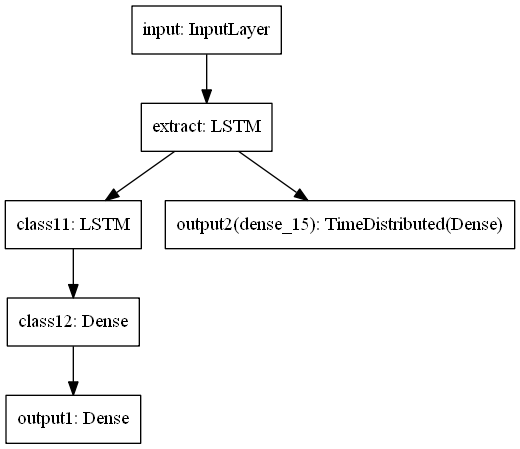

In [46]:
# 多輸出模型
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model

# 輸入層
mnist_input = Input(shape=(784, 1), name='input') # 把每一個像素想成是一序列有前後關係的time_steps

# 特徵擷取層
extract = LSTM(64, return_sequences=True, name='extract')(mnist_input)

# 分類輸出
class11 = LSTM(32, name='class11')(extract)
class12 = Dense(32, activation='relu', name='class12')(class11)
output1 = Dense(10, activation='softmax', name='output1')(class12)

# 序列輸出
output2 = TimeDistributed(Dense(10, activation='softmax'), name='output2')(extract)

# 以Model來組合整個網絡
model = Model(inputs=mnist_input, outputs=[output1, output2])

# 打印網絡結構
model.summary()

# plot graph
plot_model(model, to_file='multiple_outputs.png')

# 秀出網絡拓撲圖
Image('multiple_outputs.png')

## 6.最佳實踐
以上有一些小技巧可以幫助你充分利用函數式API定義自己的模型。
* **一致性的變量名稱命名** 對輸入（可見）和輸出神經層（輸出）使用相同的變量名，甚至可以使用隱藏層（hidden1，hidden2）。這將有助於正確地將許多的神經層連接在一起。
* **檢查圖層摘要** 始終打印模型摘要並查看圖層輸出，以確保模型如您所期望的那樣連接在一起。
* **查看網絡拓樸圖像** 總是儘可能地創建網絡拓樸圖像，並審查它，以確保一切按照你的意圖連接在一起。
* **命名圖層** 您可以為圖層指定名稱,這些名稱可以讓你的模型圖形摘要和網絡拓樸圖像更容易被解讀。例如：Dense（1，name ='hidden1'）。
* **獨立子模型** 考慮分離出子模型的發展，並最終將子模型結合在一起。

## 總結 (Conclusion)

在這篇文章中有一些個人學習到的一些有趣的重點:
    
* 使用Keras也可以很靈活地來建構複雜的深度學習網絡
* 每一種深度學習網絡拓樸基本上都可以找的到一篇論文
* 了解每種深度學習網絡拓樸架構的原理與應用的方向是強化內力的不二法門

參考: 
* [How to Use the Keras Functional API for Deep Learning](https://machinelearningmastery.com/keras-functional-api-deep-learning/)
* [Keras官網](http://keras.io/)